In [1]:
import cv2
import numpy as np
from math import sqrt 
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.feature import canny
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential, model_from_json,model_from_yaml
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# # Charger le modèle de classification binaire déjà entraîné
model = load_model('C:/Users/soltan/Desktop/project jupyter/HRD.h5')
# model = model_from_json(open('HRD.json').read())# 
# # model = model_from_yaml(open('HRD.yaml').read())#  
# model.load_weights('C:/Users/soltan/Desktop/project jupyter/HRD.h5')

# print(model.metrics_names)

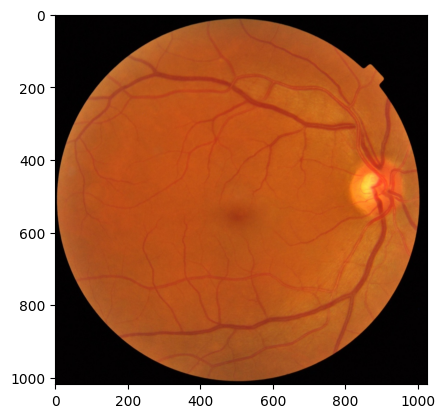

In [3]:
# Charger l'image à segmenter
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg')
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/org.tiff',img)
R,G,B = cv2.split(img)
# Convertir l'image de RGB à BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

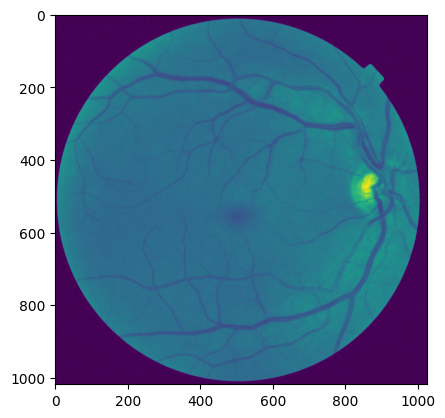

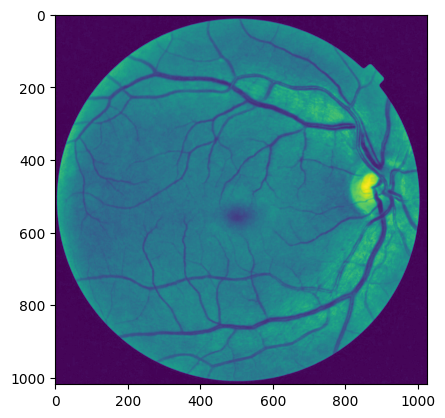

In [4]:
# Appliquer la technique CLAHE pour améliorer le contraste de l'image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img[:,:,1])
plt.imshow(G)
plt.show()
plt.imshow(img_clahe)
plt.show()

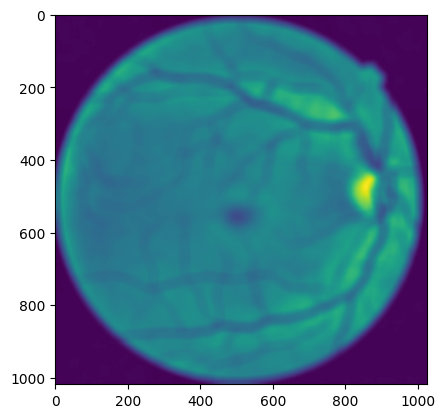

In [5]:
# average filtering
kernel = np.ones((31,31))/961
imgavg = cv2.filter2D(img_clahe,-1,kernel)
plt.imshow(imgavg)
plt.show()

[(856, 474)]
227


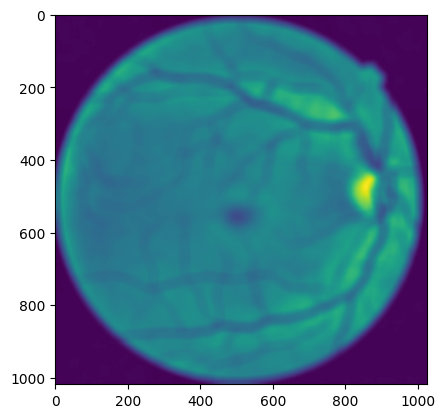

In [6]:
#intentité maximale 
hist = cv2.calcHist([img_clahe],[0],None,[256],[0,256])
maxVal = -1
maxLoc = [(0,0)]
for x in range(imgavg.shape[0]):
    for y in range(imgavg.shape[1]):
        #print(x,y)
        if imgavg[x][y] >= maxVal:
            maxVal = imgavg[x][y]
            maxLoc[0] = (y,x) 
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img.jpg',imgavg)
print(maxLoc)
loc = len(maxLoc)
imgtemp = imgavg.copy()
print(imgavg[maxLoc[0][1]][maxLoc[0][0]])
cv2.circle(imgtemp,maxLoc[loc-1],5,(0),-1)
plt.imshow(imgavg)
plt.show()

In [7]:
# # Appliquer la méthode Canny pour détecter les contours
# edges = cv2.Canny(img_clahe, 1, 100)
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # Trouver le contour du disque optique en sélectionnant le plus grand contour
# largest_contour = max(contours, key=cv2.contourArea)
# # Créer un masque pour la région d'intérêt (ROI) en utilisant le contour du disque optique
# mask = np.zeros_like(img_clahe)
# cv2.drawContours(mask, [largest_contour], 0, 255, -1)

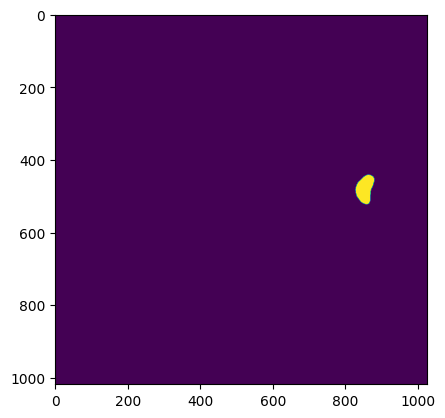

In [8]:
# thresholding
thresh, imgthresh = cv2.threshold(imgavg,180,255,cv2.THRESH_BINARY)
plt.imshow(imgthresh)
plt.show()

(array([[[860, 442]],

       [[859, 443]],

       [[858, 443]],

       [[857, 443]],

       [[856, 444]],

       [[855, 444]],

       [[854, 445]],

       [[853, 445]],

       [[852, 446]],

       [[851, 447]],

       [[850, 447]],

       [[849, 448]],

       [[848, 449]],

       [[847, 450]],

       [[846, 451]],

       [[845, 452]],

       [[844, 453]],

       [[843, 454]],

       [[842, 455]],

       [[841, 456]],

       [[840, 457]],

       [[839, 458]],

       [[838, 459]],

       [[837, 460]],

       [[836, 460]],

       [[836, 461]],

       [[835, 462]],

       [[834, 463]],

       [[833, 464]],

       [[833, 465]],

       [[832, 466]],

       [[832, 467]],

       [[831, 468]],

       [[831, 469]],

       [[830, 470]],

       [[830, 471]],

       [[830, 472]],

       [[829, 473]],

       [[829, 474]],

       [[829, 475]],

       [[828, 476]],

       [[828, 477]],

       [[828, 478]],

       [[828, 479]],

       [[828, 480]],

       [[

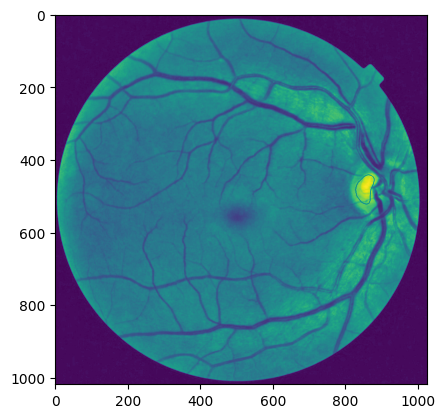

In [9]:
# contour
contours,hierarchy = cv2.findContours(imgthresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(contours)
cv2.drawContours(img_clahe, contours, contourIdx=-1, color=0, thickness=1)    
plt.imshow(img_clahe)
plt.show()

22


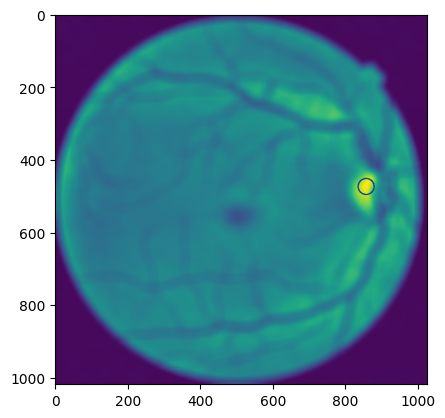

True

In [10]:
# radius
length = len(contours[0])
radius = 0
for i in range(length):
    radius = radius + sqrt((contours[0][i][0][0]-maxLoc[0][0])**2 + (contours[0][i][0][0]-maxLoc[0][0])**2)
radius = int(radius/length)
print(radius)
imgtemp2 = imgavg.copy()
cv2.circle(imgtemp2,maxLoc[loc-1],int(radius),(0),2)
plt.imshow(imgtemp2)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/Rditect.jpg',imgtemp2)

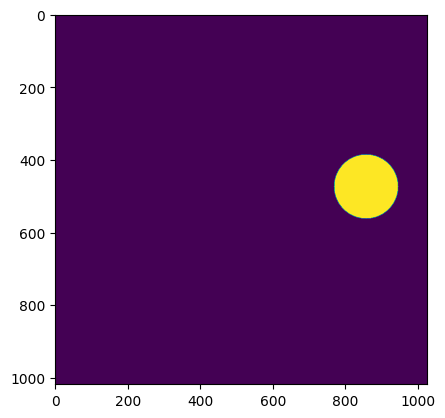

True

In [11]:
# ROI
ROIrad = radius*4
mask = np.zeros((imgthresh.shape[0],imgthresh.shape[1]), dtype=np.uint8)
cv2.circle(mask,maxLoc[loc-1],ROIrad,(255),-1)
plt.imshow(mask)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/ROIi.jpg',mask)

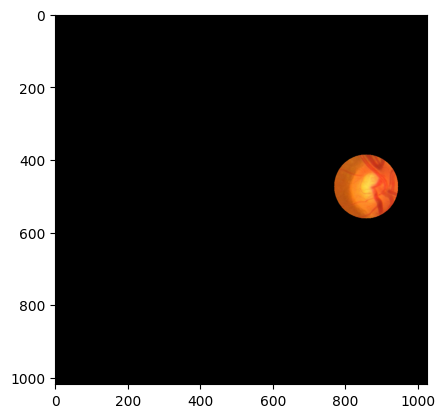

In [12]:
# Appliquer le masque sur l'image d'origine pour sélectionner la ROI
img_roi = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img_roi.tiff',img_roi)
plt.imshow(img_roi)
plt.show()

In [13]:
# # Définir la taille des patches d'image à extraire pour la classification
import numpy as np
patch_size=27
# Extraire les patches de l'image et les stocker dans un tableau
patches = []
patches_copy=[]
for i in range(0, img_clahe.shape[0]-patch_size, patch_size):
    for j in range(0, img_clahe.shape[1]-patch_size, patch_size):
        patch = img_clahe[i:i+patch_size, j:j+patch_size]
        patch = patch.reshape(-1) # reshape patch to a 1D array
#         patch = patch.reshape((patch_size, patch_size))
        patches.append(patch)
        patches_copy.append(patch)
#       # Redimensionner le patch en une forme qui peut être comprise par plt.imshow()
#         patch = patch.reshape((patch_size, patch_size))

#         # Afficher le patch
#         plt.imshow(patch, cmap='gray')
#         plt.show()
# Convertir les patches en un tableau numpy et normaliser les valeurs des pixels        
patches = np.array(patches)
patches = patches.astype('float32') / 255.0
# Prédire les patches en utilisant votre modèle de deep learning
predictions = model.predict(patches)

# Extraire les patches de vaisseaux sanguins à partir de la copie des patches
vessel_patches_copy = []
for i, patch in enumerate(patches_copy):
    # Vérifier si le patch correspond à un vaisseau sanguin
     if np.max(predictions[i]) == 1.0:
        patch = patch.reshape((patch_size, patch_size))
        vessel_patches_copy.append(patch)
       #ici je veut voir les patches qui sont 100% classé comme vessaux et les stocké dans un autre tableau pour trouver une mthode de detecter les artere et les veine



# Convertir les patches de vaisseaux sanguins en un tableau numpy et normaliser les valeurs des pixels
vessel_patches = np.array(vessel_patches_copy)
vessel_patches = vessel_patches.astype('float32') / 255.0

# # # Convertir les patches en un tableau numpy et normaliser les valeurs des pixels
# patches = np.array(patches)
# patches = patches.astype('float32') / 255.0

# # Convertir les patches de vaisseaux sanguins en un tableau numpy et normaliser les valeurs des pixels
# vessel_patches = np.array(vessel_patches)
# vessel_patches = vessel_patches.astype('float32') / 255.0
# print(len(vessel_patches))

43/43 [==============================] - 0s 1ms/step


In [14]:
print(patch.shape)
print(len(patches))
print(len(vessel_patches_copy))
print(len(vessel_patches))


(729,)
1369
21
21


le patch numéro= 0


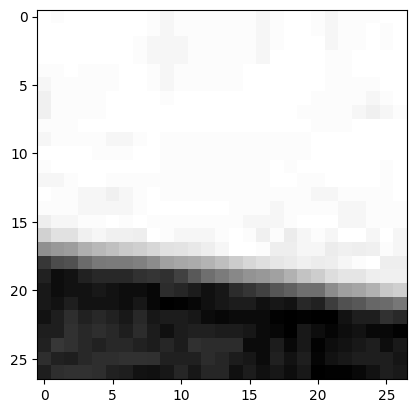

le patch numéro= 1


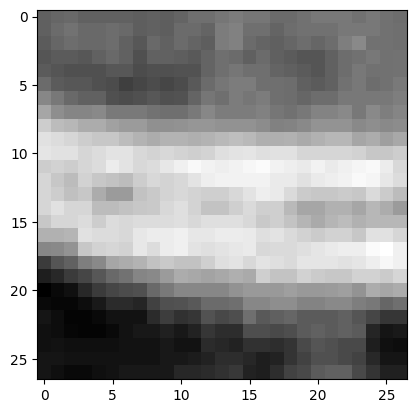

le patch numéro= 2


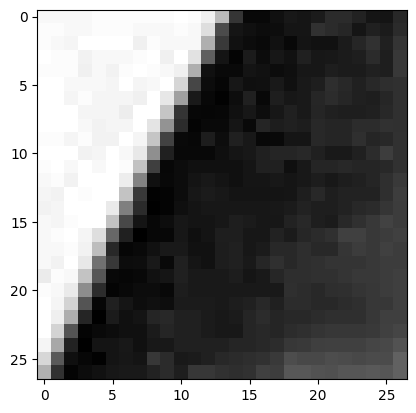

le patch numéro= 3


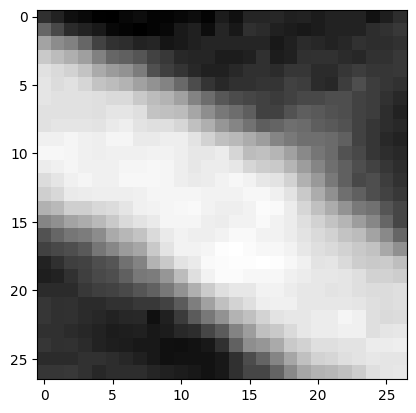

le patch numéro= 4


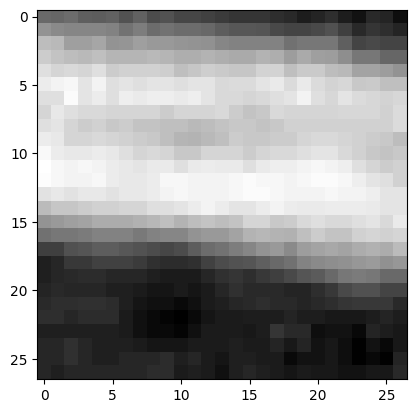

le patch numéro= 5


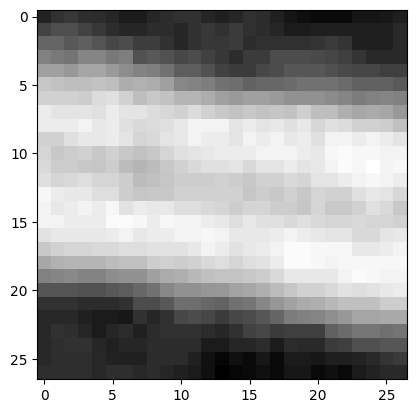

le patch numéro= 6


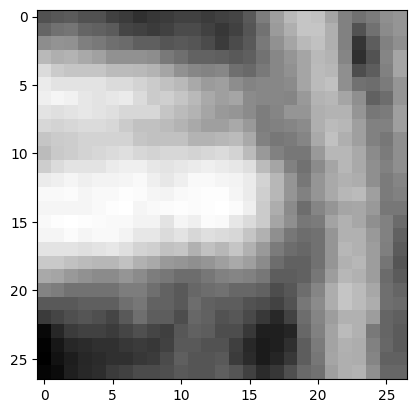

le patch numéro= 7


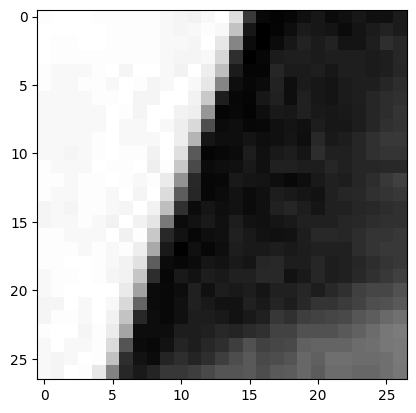

le patch numéro= 8


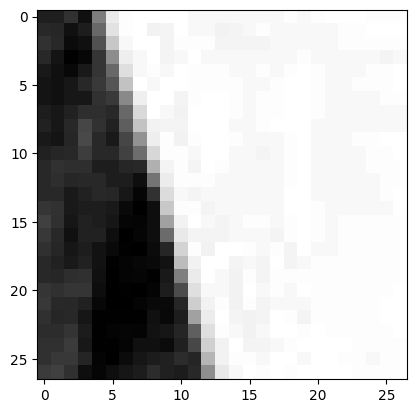

le patch numéro= 9


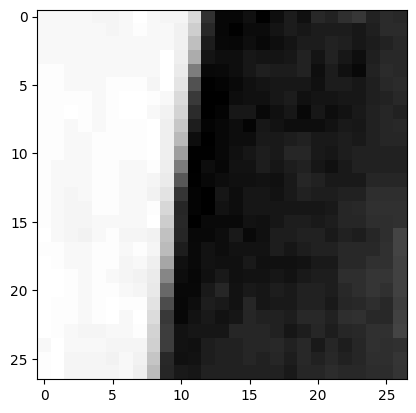

le patch numéro= 10


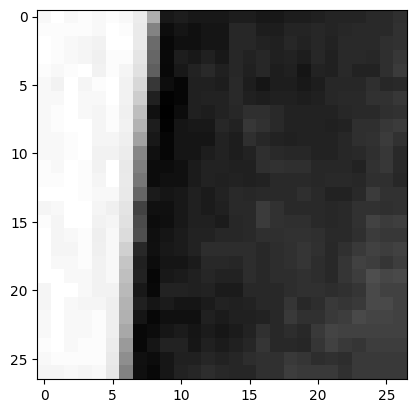

le patch numéro= 11


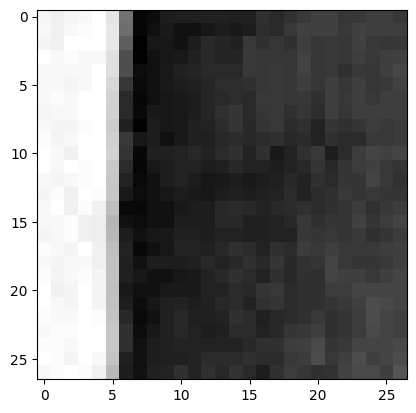

le patch numéro= 12


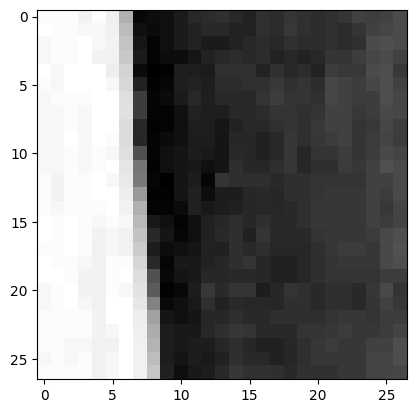

le patch numéro= 13


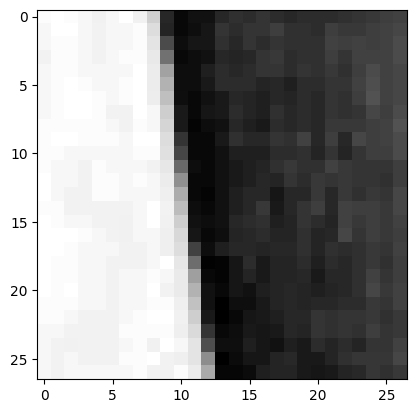

le patch numéro= 14


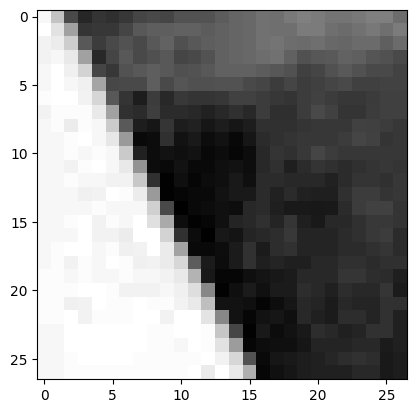

le patch numéro= 15


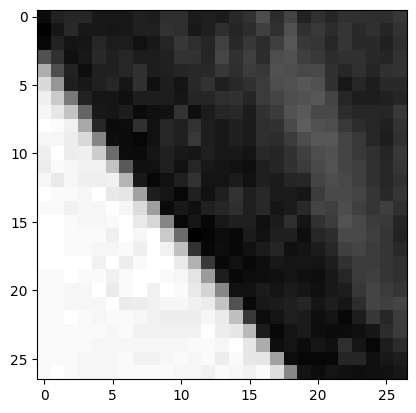

le patch numéro= 16


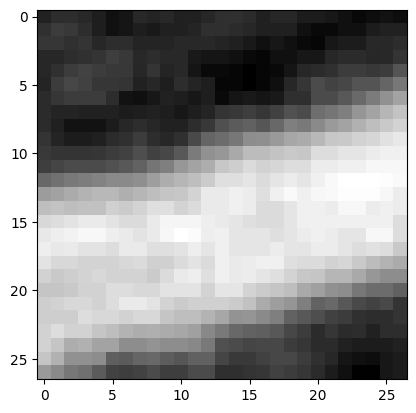

le patch numéro= 17


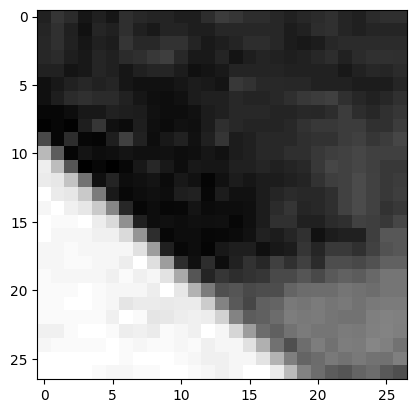

le patch numéro= 18


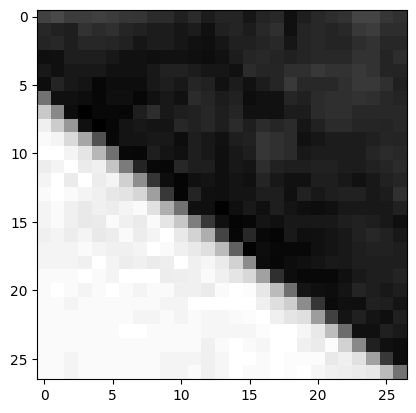

le patch numéro= 19


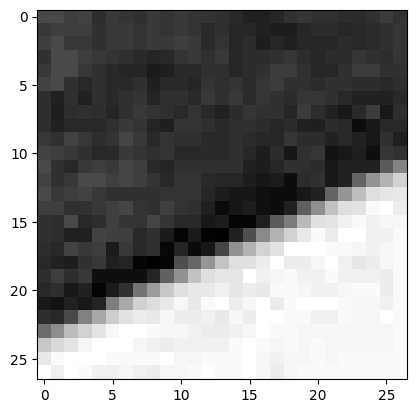

le patch numéro= 20


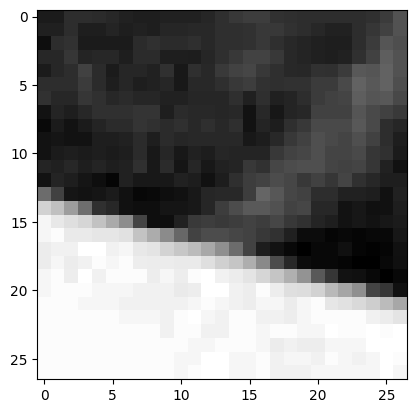

In [15]:
import matplotlib.pyplot as plt

# Définir la taille des patches
patch_size = 27

# Parcourir tous les patches dans le tableau
for i in range(len(vessel_patches_copy)):
    # Afficher le patch
    print("le patch numéro=",i)
    plt.imshow(vessel_patches_copy[i].reshape((patch_size, patch_size)), cmap='binary')
    plt.show()

In [16]:
import cv2
import numpy as np


# Définir le seuil de l'épaisseur pour différencier les artères et les veines
threshold = 2.0  # en mm
artery_thicknesses = []
vein_thicknesses = []
# Parcourir tous les patches dans la liste
for i in range(len(vessel_patches_copy)):
    # Récupérer le patch de vaisseau sanguin
    vessel_patch = vessel_patches_copy[i]
    
    if np.all(vessel_patch == 0):#image noir
        print('Patch', i+1, 'est entièrement noir. Il n\'y a pas ni veine ni artere detecté ')
        continue
    elif np.all(vessel_patch == 255):#image blanche
        print('Patch', i+1, 'est entièrement blanc.  Il n\'y a pas ni veine ni artere detecté ')
        continue
    
    # Appliquer un seuillage d'intensité pour isoler les vaisseaux sanguins
    ret, thresh = cv2.threshold(vessel_patch, 127, 255, cv2.THRESH_BINARY)

    # Trouver les contours des vaisseaux sanguins
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Calculer l'épaisseur de chaque vaisseau sanguin
    thicknesses = []
    for c in contours:
        # Calculer le périmètre du contour
        perimeter = cv2.arcLength(c, True)

        # Vérifier si le périmètre est supérieur à zéro pour éviter une division par zéro
        if perimeter > 0:
            # Calculer l'aire du contour
            area = cv2.contourArea(c)

            # Calculer l'épaisseur comme le rapport de l'aire sur le périmètre
            thickness = area / perimeter
#             print("l'epaisseur detecter pour le patch numéro°",i,"est =",thickness)

            # Ajouter l'épaisseur à la liste
            thicknesses.append(thickness)

    # Identifier les artères et les veines en fonction de leur épaisseur
    arteries = 0
    veins = 0
    for t in thicknesses:
        if t > threshold:
            arteries += 1
            artery_thicknesses.append(t)
        else:
            veins += 1
            vein_thicknesses.append(t)

    # Afficher le nombre d'artères et de veines dans le patch
#     print('Patch', i+1)
#     print('Artères:', arteries)
#     print('Veines:', veins)
print(" le nombre des artère détecté =",len(artery_thicknesses))
print(" la nombre des veine détecté =",len(vein_thicknesses))
#maintant calculer moyennes des epaisseur
a=0
MA=0
for i in  range(len(artery_thicknesses)):
    a+=artery_thicknesses[i]
MA=a/(len(artery_thicknesses))
print("la somme de la liste des artères =",a)
print("la longeur de la liste des artères=",len(artery_thicknesses))
b=0
MV=0
for j in  range(len(vein_thicknesses)):
    b+=vein_thicknesses[j]
MV=b/len(vein_thicknesses)
print("la somme de la liste des veine =",b)
print("la longeur de la liste des veine=",len(vein_thicknesses))
AVR= a/b
print("Arteriovenous Ratio (AVR) = ",AVR)
if AVR > 0.9:
    print("rétinopathie hypertensive de stade 1")
elif 0.8 < AVR <= 0.9:
    print("rétinopathie hypertensive de stade 2")
elif 0.7 <= AVR <= 0.8:
    print("rétine saine")
elif 0.6 < AVR < 0.7:
    print("rétinopathie hypertensive de stade 3")
elif AVR <= 0.5:
    print("rétinopathie hypertensive de stade 4")

 le nombre des artère détecté = 10
 la nombre des veine détecté = 88
la somme de la liste des artères = 34.43063494809749
la longeur de la liste des artères= 10
la somme de la liste des veine = 37.092937350773845
la longeur de la liste des veine= 88
Arteriovenous Ratio (AVR) =  0.9282261639864223
rétinopathie hypertensive de stade 1


In [17]:
# Convertir les prédictions en une image binaire
import numpy as np
patch_size=27
binary_image = np.zeros_like(img_clahe)
test= np.zeros_like(img_roi)
idx = 0
for i in range(0, img_clahe.shape[0]-patch_size, patch_size):
    for j in range(0, img_clahe.shape[1]-patch_size, patch_size):
        if predictions[idx][1] > predictions[idx][0]:  # check if second class probability is higher than first
            binary_image[i:i+patch_size, j:j+patch_size] = 255
        idx += 1

In [18]:
print(binary_image.shape)

(1018, 1024)


In [19]:
# Appliquer un filtre morphologique pour améliorer la qualité de la segmentation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/tt1.tiff',binary_image)

True

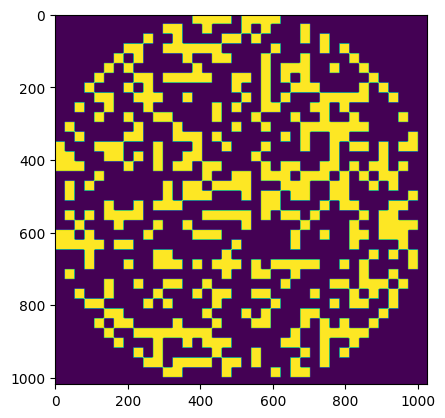

In [20]:
# Afficher l'image segmentée
plt.imshow(binary_image)
plt.show()

In [21]:
# Générer l'image segmentée en superposant le masque binaire sur l'image d'origine
overlay = cv2.addWeighted(img, 0.5, cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR), 0.5, 0)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/tt11.tiff',overlay)

True

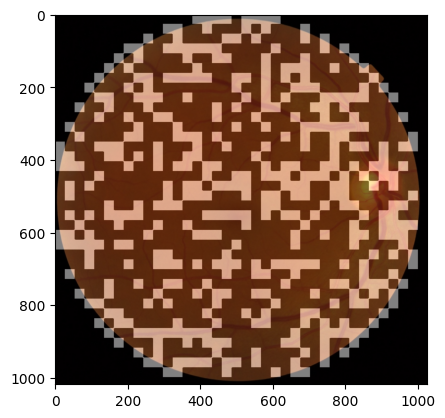

(1018, 1024, 3)


In [22]:
# Afficher l'image segmentée
plt.imshow(overlay)
plt.show()
print(overlay.shape)

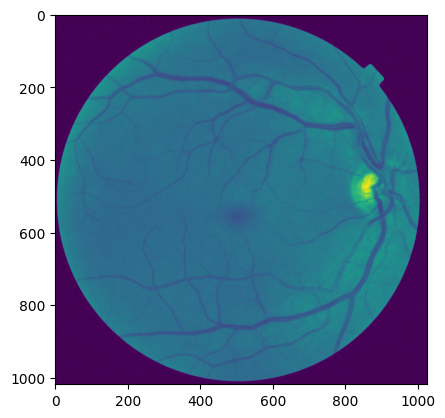

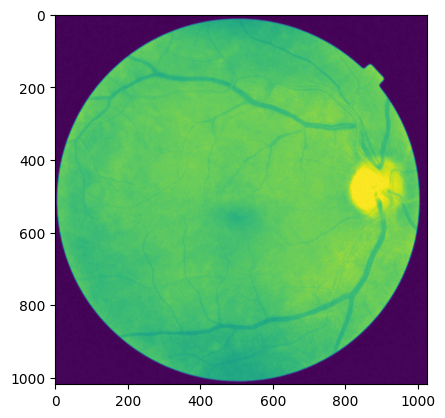

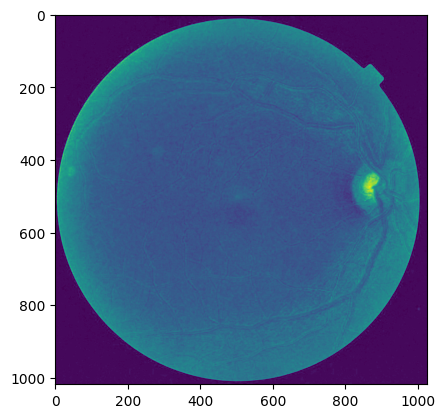

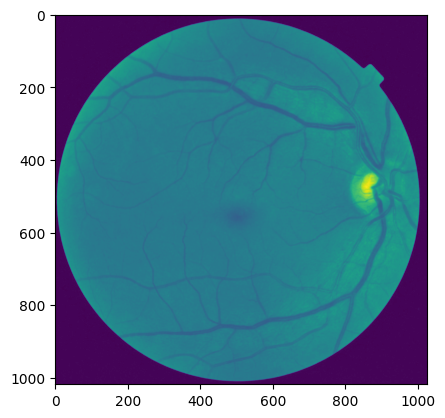

In [23]:
import cv2
import numpy as np
from math import sqrt 
import matplotlib.pyplot as plt
r,imageGreen,b = cv2.split(img)
plt.imshow(imageGreen)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/greenchannel.tiff',imageGreen)
plt.imshow(r)
plt.show()
plt.imshow(b)
plt.show()
plt.imshow( cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
plt.show()

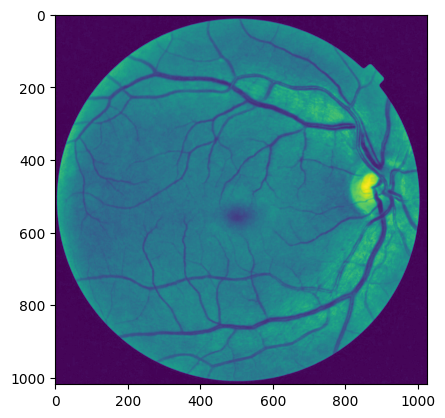

True

In [24]:
 
# appplying contrast limited adaptive histogram equalisation
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
imageEqualized = clahe.apply(imageGreen)
plt.imshow(imageEqualized)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/equalized.tiff',imageEqualized)

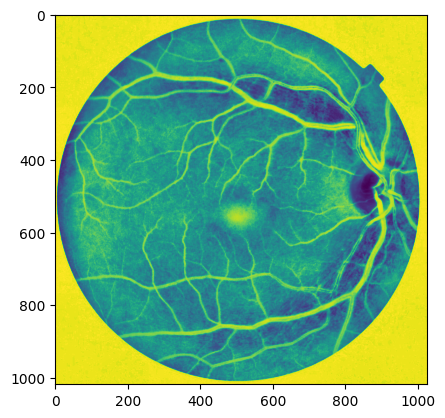

True

In [25]:
  # inversion 
imageInv2 = 255 - imageEqualized
imageInv = clahe.apply(imageInv2)
plt.imshow(imageInv)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/inverted.tiff',imageInv)    

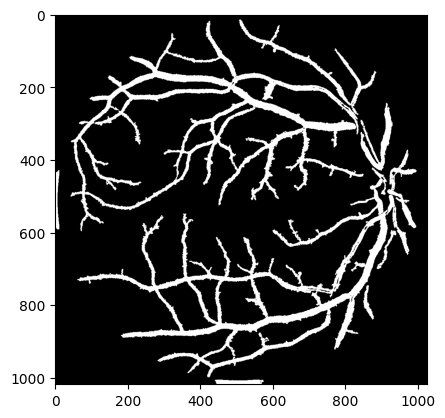

In [26]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


def extract_bv(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)

    # applying alternate sequential filtering (3 times closing opening)
    r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
    f5 = clahe.apply(f4)

    # removing very small contours through area parameter noise removal
    ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255
    contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)

    # removing blobs of unwanted bigger chunks taking in consideration they are not straight lines like blood
    #vessels and also in an interval of area
    fundus_eroded = cv2.bitwise_not(newfin)	
    xmask = np.ones(fundus.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)  
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)

    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
    blood_vessels = cv2.bitwise_not(finimage)
    return blood_vessels

if __name__ == "__main__":
    fundus = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg', cv2.IMREAD_COLOR)
    bloodvessel = extract_bv(fundus)
    cv2.imwrite("C:/Users/soltan/Desktop/project jupyter/DB/bloodvessel.tiff",bloodvessel)
#     # Afficher l'image en niveaux de gris
#     plt.imshow(fundus, cmap='gray')
#     plt.show()
    # Afficher l'image segmentée des vaisseaux sanguins
    plt.imshow(bloodvessel, cmap='binary')
    plt.show()

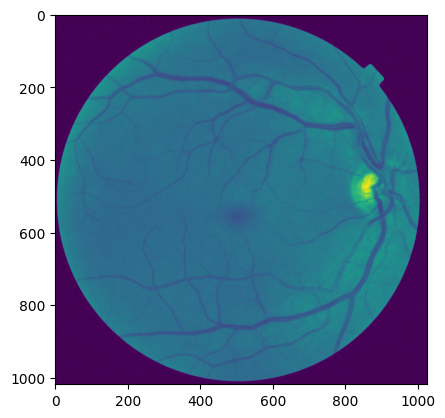

(1018, 1024) (1018, 1024)
intensity sum 3237374
intensity mean 133 and count 24313


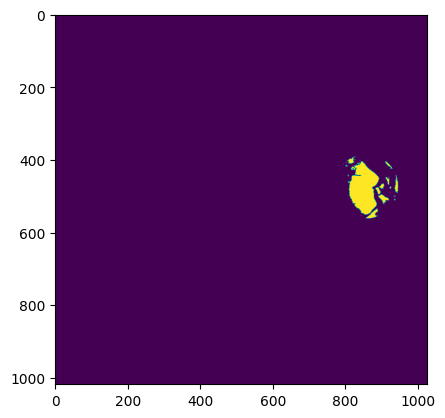

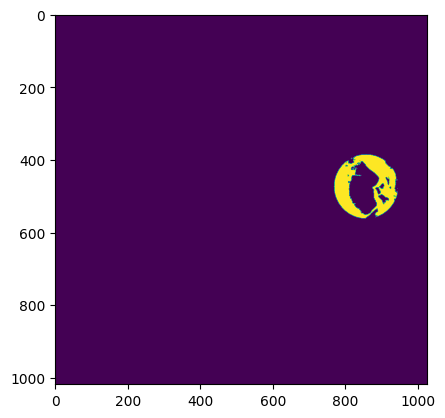

In [47]:
# detecting artery and vein
mask2 = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/org.tiff')
imgseg =  cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/inverted.tiff')
_,mask2,_ = cv2.split(mask2)
plt.imshow(mask2)
plt.show()
print(mask.shape,mask2.shape)
count = 0
intensity = 0
for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):       
        if mask[x][y] and mask2[x][y]:
            intensity = intensity + imgseg[x][y][1]
            count = count + 1
print('intensity sum {}'.format(intensity))       
intensitymean = int(intensity/count)
print('intensity mean {} and count {}'.format(intensitymean,count))
artery = mask.copy()
vein = mask.copy()
for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):
        if mask[x][y] and mask2[x][y]:
            if imgseg[x][y][1] >= intensitymean-15:
                artery[x][y] = 0
            else:
                vein[x][y] = 0
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/artery11111.tiff',artery)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/vein11111.tiff',vein)            
plt.imshow(artery)     
plt.show()

plt.imshow(vein)
plt.show()

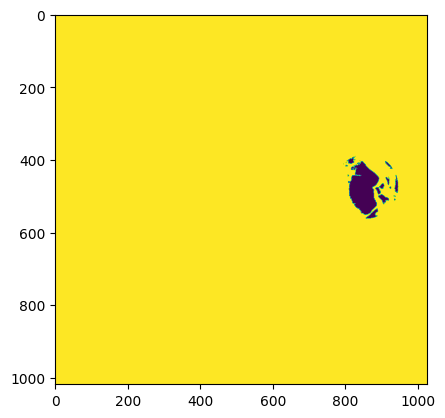

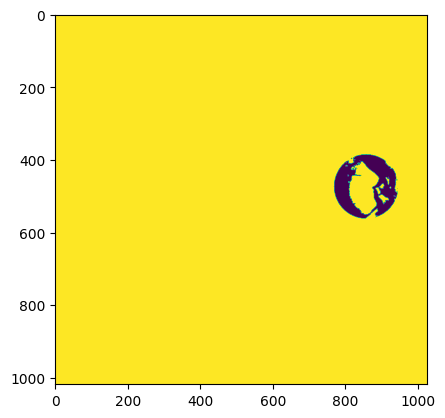

True

In [48]:
# invert
artery = 255 - artery
vein = 255 - vein
plt.imshow(artery)
plt.show()
plt.imshow(vein)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/artery.tiff',artery)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/vein.tiff',vein)

uint8
1018
1018


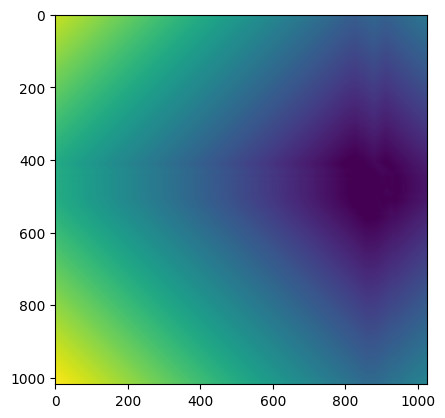

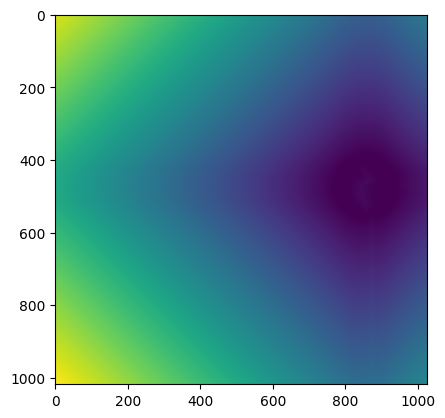

True

In [55]:
# distance transform
print(artery.dtype)
arteryDist = cv2.distanceTransform(artery,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
veinDist = cv2.distanceTransform(vein,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
print(len(arteryDist))
print(len(veinDist))
plt.imshow(arteryDist)
plt.show()
plt.imshow(veinDist)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/veinDist.tiff', veinDist)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/arteryDist.tiff', arteryDist)

Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation compl

Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction c

Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Ero

Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction c

Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning p

Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Ero

Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction completed
Thinning process in progress
Erosion completed
Dilation completed
Subtraction c

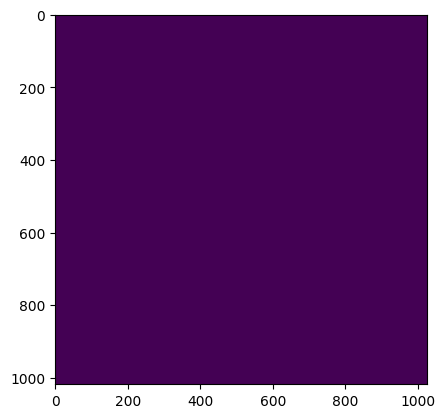

Output image saved


In [30]:
# thinning 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
size = np.size(arteryDist)
arteryskel = np.zeros(arteryDist.shape,np.uint8)
done = False
while not done:
    eroded = cv2.erode(arteryDist, kernel)
    print('Erosion completed')
    temp = cv2.dilate(eroded, kernel)
    print('Dilation completed')
    temp = cv2.subtract(arteryDist, temp)
    print('Subtraction completed')
    arteryskel = temp.copy()
    arteryDist = eroded.copy()
 
    if cv2.countNonZero(arteryDist) == 0:
        done = True
        print('Thinning process completed')
    else:
        print('Thinning process in progress')
print(done)
plt.imshow(arteryskel)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/arteryskel1.tiff',arteryskel)
print('Output image saved')

True


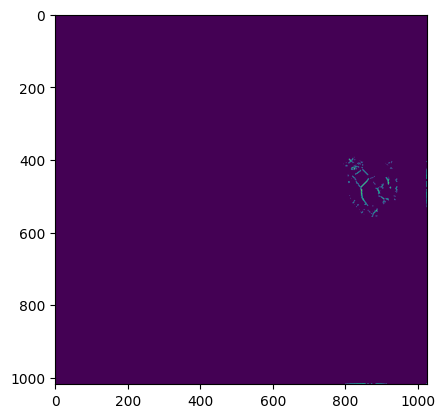

True

In [31]:
                    
veinskel = np.zeros(veinDist.shape,np.uint8)
done = False
while( not done):
    eroded = cv2.erode(veinDist,kernel)
    temp = cv2.dilate(eroded,kernel)
    temp = cv2.subtract(veinDist,temp)
    veinskel = temp.copy()
    veinDist = eroded.copy()
 
    if cv2.countNonZero(arteryDist) == 0:  
        done = True

print(done)
plt.imshow(veinskel)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/veinskel.tiff',veinskel)

In [56]:
venuole = []
arteriole = []
for x in range(veinDist.shape[0]):
    for y in range(veinDist.shape[1]):
        if veinDist[x][y] > 0:
            venuole.append(abs(veinDist[x][y]))
        if arteryDist[x][y] > 0:
            arteriole.append(abs(arteryDist[x][y]))

venuole = sorted(venuole)
arteriole = sorted(arteriole)
print("venuole=",venuole)
print("arteriole",arteriole)
lenven = len(venuole)
print('length of lenven {} {} {}'.format(lenven,lenven//2,lenven//2-1))
if lenven%2 == 1:
    Wa = venuole[lenven//2]
    if lenven//2 == 0:
        Wb = venuole[0]
    else:
        Wb = venuole[lenven//2 - 1]
else:
    Wa = (venuole[lenven//2 - 1] + venuole[lenven//2])// 2
    Wb = venuole[lenven//2 - 1]
print(Wa,Wb)
CRVE = sqrt(0.72*(Wa**2) + 0.91*(Wb**2) + 450.02)
print("CRVE=",CRVE)
lenart = len(arteriole)
print('length of lenart {} {} {}'.format(lenart,lenart//2,lenart//2-1))
if lenart%2 == 1:
    Wa = arteriole[lenart//2]
    if lenart//2 == 0:
        Wb = arteriole[0]
    else:
        Wb = arteriole[lenart//2 - 1]
else:
    Wa = (arteriole[lenart//2 - 1] + arteriole[lenart//2])// 2
    Wb = arteriole[lenart//2 - 1]

print(Wa,Wb)
CRAE = sqrt(0.8*(Wa**2) + 1.01*(Wb**2) - 0.22*Wa*Wb-10.73)
print("CRAE=",CRAE)
if len(venuole) == 0 or len(arteriole) == 0:
    print("Il n'y a pas de vaisseaux dans l'image")
else:
    artervenratio = CRAE/CRVE
print('arteriovenous ratio {}'.format(artervenratio))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
# Charger l'image
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/veinskel.tiff', cv2.IMREAD_GRAYSCALE)

# Trouver les valeurs uniques dans l'image
unique_values = np.unique(img)
print(unique_values)
# Vérifier si l'image est binaire ou non
if len(unique_values) == 2:
    print("L'image est binaire.")
else:
    print("L'image n'est pas binaire.")

[None]
L'image n'est pas binaire.


In [51]:
import cv2
import numpy as np

# Load retinal image and vessel segmentation mask
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/tt11.tiff')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Compute the mean green intensity of the pixels within the vessel segmentation mask
mean_intensity = np.mean(g[mask > 0])

# Classify pixels as artery or vein based on their green intensity value
artery_mask = np.logical_and(mask, g > mean_intensity)
vein_mask = np.logical_and(mask, g <= mean_intensity)

# Save artery and vein masks as separate images
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/artery_mask.tiff', artery_mask.astype(np.uint8) * 255)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/vein_mask.tiff', vein_mask.astype(np.uint8) * 255)

True

uint8
1018
1018


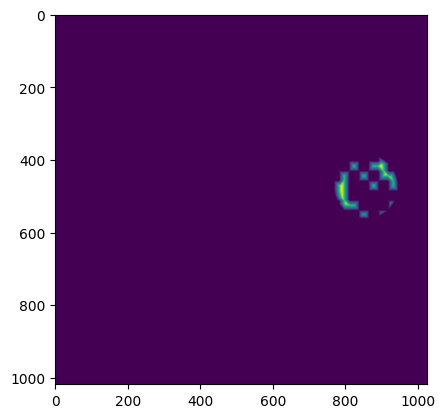

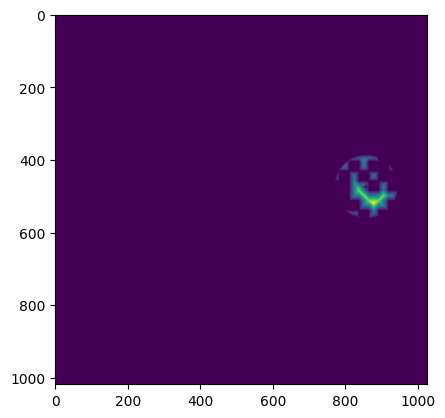

True

In [52]:
# distance transform
print(artery.dtype)
arteryDist = cv2.distanceTransform( artery_mask.astype(np.uint8) * 255,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
veinDist = cv2.distanceTransform( vein_mask.astype(np.uint8) * 255,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
print(len(arteryDist))
print(len(veinDist))
plt.imshow(arteryDist)
plt.show()
plt.imshow(veinDist)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/veinDistmet2.tiff', veinDist)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/arteryDistmet2.tiff', arteryDist)

In [53]:
venuole = []
arteriole = []
for x in range(veinDist.shape[0]):
    for y in range( veinDist.shape[1]):
        if  veinDist[x][y] > 0:
            venuole.append(abs( veinDist[x][y]))
        if arteryDist[x][y] > 0:
            arteriole.append(abs(arteryDist[x][y]))

venuole = sorted(venuole)
arteriole = sorted(arteriole)
print("venuole=",venuole)
print("arteriole",arteriole)
lenven = len(venuole)
print('length of lenven {} {} {}'.format(lenven,lenven//2,lenven//2-1))
if lenven%2 == 1:
    Wa = venuole[lenven//2]
    if lenven//2 == 0:
        Wb = venuole[0]
    else:
        Wb = venuole[lenven//2 - 1]
else:
    Wa = (venuole[lenven//2 - 1] + venuole[lenven//2])// 2
    Wb = venuole[lenven//2 - 1]
print(Wa,Wb)
CRVE = sqrt(0.72*(Wa**2) + 0.91*(Wb**2) + 450.02)
print("CRVE=",CRVE)
lenart = len(arteriole)
print('length of lenart {} {} {}'.format(lenart,lenart//2,lenart//2-1))
if lenart%2 == 1:
    Wa = arteriole[lenart//2]
    if lenart//2 == 0:
        Wb = arteriole[0]
    else:
        Wb = arteriole[lenart//2 - 1]
else:
    Wa = (arteriole[lenart//2 - 1] + arteriole[lenart//2])// 2
    Wb = arteriole[lenart//2 - 1]

print(Wa,Wb)
CRAE = sqrt(0.8*(Wa**2) + 1.01*(Wb**2) - 0.22*Wa*Wb-10.73)
print("CRAE=",CRAE)
if len(venuole) == 0 or len(arteriole) == 0:
    print("Il n'y a pas de vaisseaux dans l'image")
else:
    artervenratio = CRAE/CRVE
print('arteriovenous ratio {}'.format(artervenratio))

venuole= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 